In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, string


In [2]:
# load the dataset
data = open('E:\irFinal\supermails11.txt').read()
dataz=data.split('\t')
labels, texts = [], []
for line in enumerate(dataz):
    linez=line[1].split('\n')
    #print(linez)
    if linez[0]=='':
        s=''
        for i in range(1,len(linez)):
            s+=linez[i]
        if s!='':
            texts.append(s)
    else:
        labels.append(linez[0])
        s=''
        for i in range(1,len(linez)):
            s+=linez[i]
        if s!='':
            texts.append(s)



In [3]:
# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [4]:
trainDF.text

0     "TechGig Code Gladiators 2020 crosses 1 lakh r...
1     "Has being given a free Pro membership helped?...
2     "TechGig Code Gladiators 2020 crosses 1 lakh r...
3     "Are you a fresher? Here's why you should atte...
4     "The May Long Challenge is just around the cor...
5     "Live Problem DiscussionWe’ve been organizing ...
6     Codecheffers are making the most of this time ...
7     "Note that Cook-Off is on a Monday this month ...
8     "You can book your spot here. To Register, jus...
9     "Hey Geek,   Are you ready to face the big sho...
10    "Women across different career fields are leav...
11    "You're receiving this monthly email because y...
12    Your Google Account was just signed in to from...
13    "Adding Google Chrome, Google Chrome OS and Go...
14    "No changes to our Privacy Policy: We’re not m...
15    Google can use this phone number to make sure ...
16    "No changes to our Privacy Policy: We’re not m...
17    "If you’re the guardian of a child under t

In [6]:
trainDF

,text,label
0,"""TechGig Code Gladiators 2020 crosses 1 lakh r...",competitions
1,"""Has being given a free Pro membership helped?...",competitions
2,"""TechGig Code Gladiators 2020 crosses 1 lakh r...",competitions
3,"""Are you a fresher? Here's why you should atte...",competitions
4,"""The May Long Challenge is just around the cor...",competitions
5,"""Live Problem DiscussionWe’ve been organizing ...",competitions
6,Codecheffers are making the most of this time ...,competitions
7,"""Note that Cook-Off is on a Monday this month ...",competitions
8,"""You can book your spot here. To Register, jus...",competitions
9,"""Hey Geek, Are you ready to face the big sho...",competitions


In [7]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [8]:
train_x

21    "If you have extra time or you'd like to take ...
27    "Adobe Create    Learn new ways to create with...
48    "1 QUESTION FOR YOUWhat would 10-year-old me s...
5     "Live Problem DiscussionWe’ve been organizing ...
50    "Another year complete. Here's a quick recap o...
43    "1 QUESTION FOR YOUCan you sit still, do nothi...
14    "No changes to our Privacy Policy: We’re not m...
28    "Think of the opportunities you could unlock w...
41    "The architect Christopher Alexander on how to...
10    "Women across different career fields are leav...
22    "Plus, discover how to adapt your classes for ...
1     "Has being given a free Pro membership helped?...
45    "2 QUOTES FROM OTHERSI.The author and generall...
13    "Adding Google Chrome, Google Chrome OS and Go...
44    "Happy Thursday! Allow me to spice up your inb...
4     "The May Long Challenge is just around the cor...
25    "What could an investment in a year of limitle...
18    "You'll get Google sign-in prompts on all 

In [6]:
#Feature Engineering

In [9]:
# count vectors
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [10]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [11]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [12]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [43]:
# Naive Bayes on Count Vectors
nbcaccuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", nbcaccuracy)

NB, Count Vectors:  0.46153846153846156


In [46]:
# Naive Bayes on Word Level TF IDF Vectors
nbtaccuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", nbtaccuracy)



NB, WordLevel TF-IDF:  0.46153846153846156


In [49]:
nbnaccuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", nbnaccuracy)


NB, N-Gram Vectors:  0.3076923076923077


In [53]:
# SVM on Ngram Level TF IDF Vectors
svmtaccuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM, TF-IDF: ", svmtaccuracy)

SVM, TF-IDF:  0.3076923076923077


In [57]:
# SVM on Ngram Level TF IDF Vectors
svmcaccuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print("SVM,Count Vectors: ", svmcaccuracy)

SVM,Count Vectors:  0.38461538461538464


In [61]:
# SVM on Ngram Level TF IDF Vectors
svmnaccuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", svmnaccuracy)

SVM, N-Gram Vectors:  0.15384615384615385


In [19]:
#Bagging Model

In [20]:
# RF on Count Vectors
rfcaccuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("Bagging Model, Count Vectors: ", rfcaccuracy)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Bagging Model, Count Vectors:  0.46153846153846156


In [21]:
# RF on Word Level TF IDF Vectors
rftaccuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("Bagging Model, WordLevel TF-IDF: ", rftaccuracy)

Bagging Model, WordLevel TF-IDF:  0.38461538461538464


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# RF on Word Level TF IDF Vectors
rfnaccuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("Bagging Model, N-Gram Vectors: ", rfnaccuracy)

Bagging Model, N-Gram Vectors:  0.23076923076923078


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
#CNN

In [24]:
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [25]:
#classification -knn - k_Nearest_Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain_count, train_y)
knn.score(xvalid_count,valid_y)
knnc=train_model(KNeighborsClassifier(n_neighbors=5),  xtrain_count, train_y, xvalid_count)
knnt=train_model(KNeighborsClassifier(n_neighbors=5), xtrain_tfidf, train_y, xvalid_tfidf)
knnn=train_model(KNeighborsClassifier(n_neighbors=5), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("KNN, Count Vectors: ", knnc)
print("KNN, WordLevel TF-IDF: ", knnt)
print("KNN, N-Gram Vectors: ", knnn)

KNN, Count Vectors:  0.38461538461538464
KNN, WordLevel TF-IDF:  0.5384615384615384
KNN, N-Gram Vectors:  0.3076923076923077


In [27]:
print("NB, Count Vectors: ", nbcaccuracy)
print("NB, WordLevel TF-IDF: ", nbtaccuracy)
print("NB, N-Gram Vectors: ", nbnaccuracy)
print("SVM,Count Vectors: ", svmcaccuracy)
print("SVM, TF-IDF: ", svmtaccuracy)
print("SVM, N-Gram Vectors: ", svmnaccuracy)
print("Bagging Model, Count Vectors: ", rfcaccuracy)
print("Bagging Model, WordLevel TF-IDF: ", rftaccuracy)
print("Bagging Model, N-Gram Vectors: ", rfnaccuracy)
print("KNN, Count Vectors: ", knnc)
print("KNN, WordLevel TF-IDF: ", knnt)
print("KNN, N-Gram Vectors: ", knnn)

NB, Count Vectors:  0.46153846153846156
NB, WordLevel TF-IDF:  0.46153846153846156
NB, N-Gram Vectors:  0.3076923076923077
SVM,Count Vectors:  0.38461538461538464
SVM, TF-IDF:  0.3076923076923077
SVM, N-Gram Vectors:  0.15384615384615385
Bagging Model, Count Vectors:  0.46153846153846156
Bagging Model, WordLevel TF-IDF:  0.38461538461538464
Bagging Model, N-Gram Vectors:  0.23076923076923078
KNN, Count Vectors:  0.38461538461538464
KNN, WordLevel TF-IDF:  0.5384615384615384
KNN, N-Gram Vectors:  0.3076923076923077


Kmeans on our data

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'body': map_to_list(emails, 'body'), 
        'to': map_to_list(emails, 'to'), 
        'from_': map_to_list(emails, 'from')
    }

def map_to_list(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append('')
        else:
            results.append(email[key])
    return results

def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []

    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [31]:
stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vect = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
X = vect.fit_transform(trainDF.text)
features = vect.get_feature_names()

# Let's print the top 10 terms in document 1
print(top_feats_in_doc(X, features, 1, 10))
n_clusters = 5
clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(X)

     features     score
0         pro  0.669148
1    exciting  0.223049
2        tips  0.223049
3         did  0.223049
4    starting  0.223049
5       given  0.223049
6         lot  0.223049
7       going  0.223049
8  codecademy  0.223049
9        love  0.193475


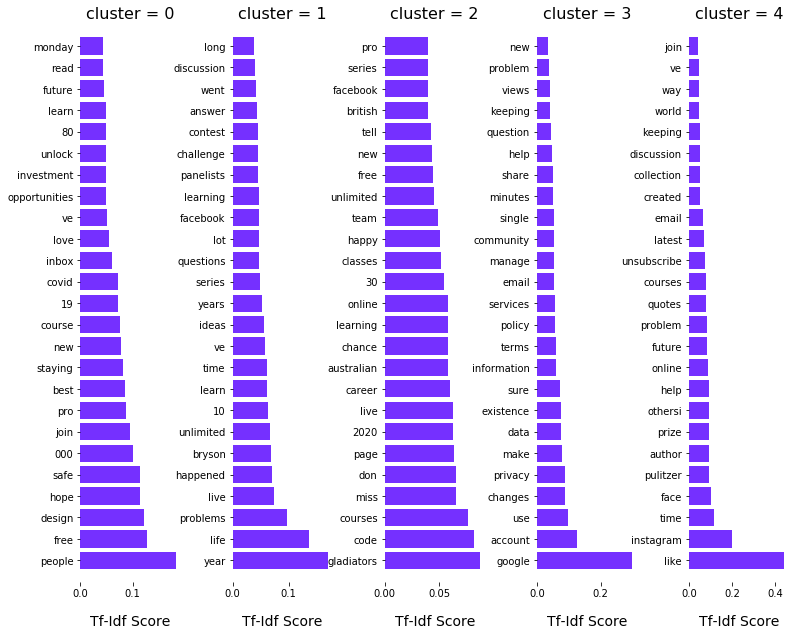

In [32]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))